### Importing the libaries

In [1]:
import pandas as pd
import numpy as np
import pickle
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import sklearn
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import RandomizedSearchCV
import warnings
warnings.filterwarnings('ignore')
import imblearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, f1_score
from sklearn.model_selection import cross_val_score

### Load the dataset

In [2]:
data=pd.read_csv('loan_prediction.csv')

In [3]:
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [5]:
data.shape

(614, 13)

In [6]:
data.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

### Uni-Variate Analysis

<AxesSubplot:xlabel='ApplicantIncome', ylabel='Density'>

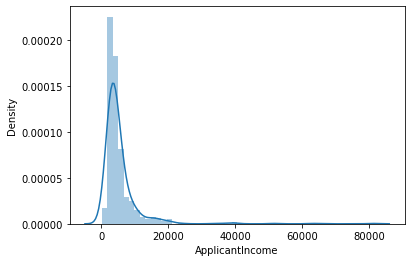

In [7]:
sns.distplot(data.ApplicantIncome)

<AxesSubplot:xlabel='Property_Area', ylabel='count'>

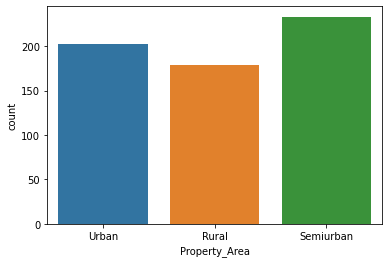

In [8]:
sns.countplot(data.Property_Area)

<AxesSubplot:xlabel='Gender', ylabel='count'>

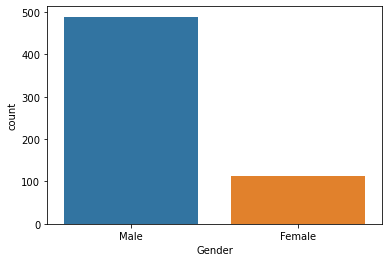

In [9]:
sns.countplot(data.Gender)

<AxesSubplot:xlabel='Education', ylabel='count'>

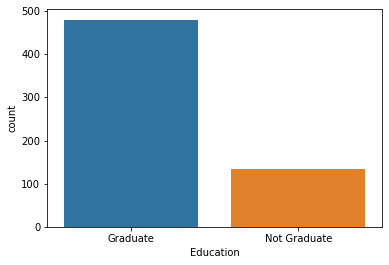

In [10]:
sns.countplot(data.Education)

<AxesSubplot:xlabel='Self_Employed', ylabel='count'>

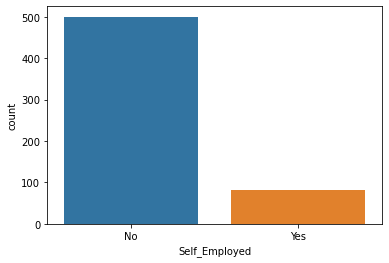

In [11]:
sns.countplot(data.Self_Employed)

<AxesSubplot:xlabel='Married', ylabel='count'>

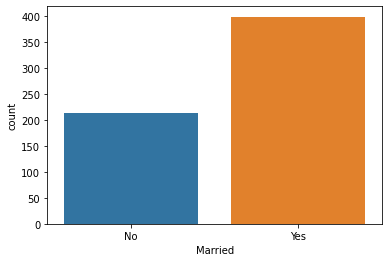

In [12]:
sns.countplot(data.Married)

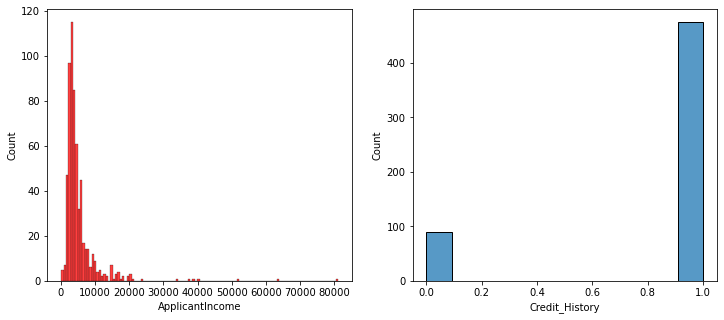

In [13]:
plt.figure(figsize=(12,5))
plt.subplot(121)
sns.histplot(data['ApplicantIncome'], color='r')
plt.subplot(122)
sns.histplot(data['Credit_History'])
plt.show()

### Bivariate Analysis

<AxesSubplot:xlabel='Married', ylabel='count'>

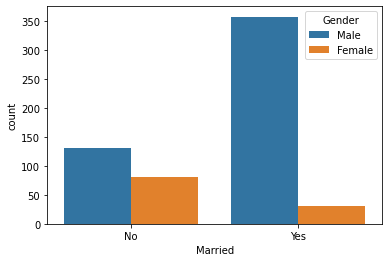

In [14]:
sns.countplot(data['Married'],hue=data['Gender'])

<AxesSubplot:xlabel='LoanAmount', ylabel='count'>

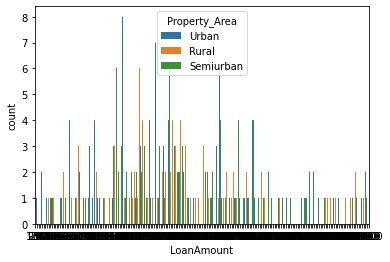

In [15]:
sns.countplot(data['LoanAmount'],hue=data['Property_Area'])

<AxesSubplot:xlabel='Education', ylabel='count'>

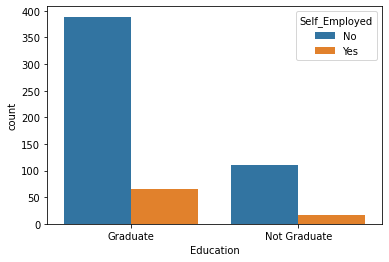

In [16]:
sns.countplot(data['Education'],hue=data['Self_Employed'])

<AxesSubplot:xlabel='ApplicantIncome', ylabel='CoapplicantIncome'>

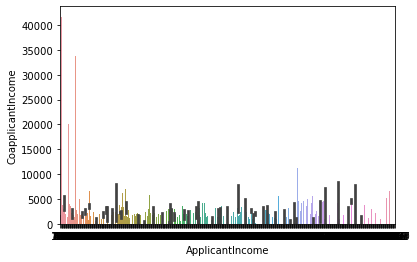

In [17]:
sns.barplot(data.ApplicantIncome,data.CoapplicantIncome)

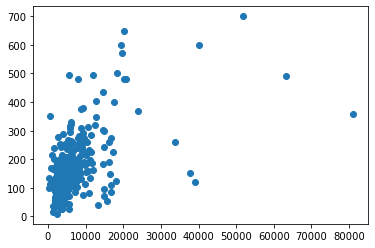

In [18]:
plt.scatter(data.ApplicantIncome,data.LoanAmount)

<AxesSubplot:xlabel='Dependents', ylabel='count'>

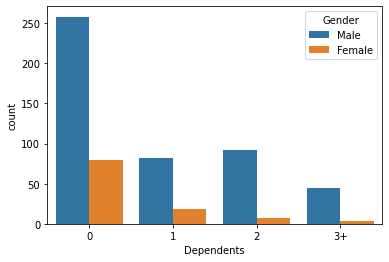

In [19]:
sns.countplot(data['Dependents'],hue=data['Gender'])

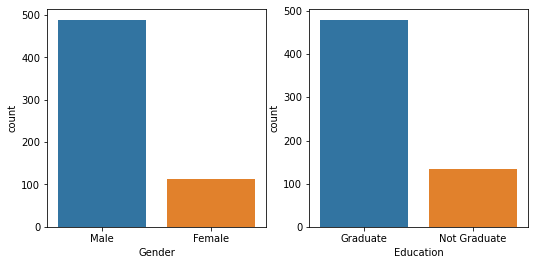

In [20]:
plt.figure(figsize=(18,4))
plt.subplot(1,4,1)
sns.countplot(data['Gender'])
plt.subplot(1,4,2)
sns.countplot(data['Education'])
plt.show()

<AxesSubplot:xlabel='Property_Area', ylabel='count'>

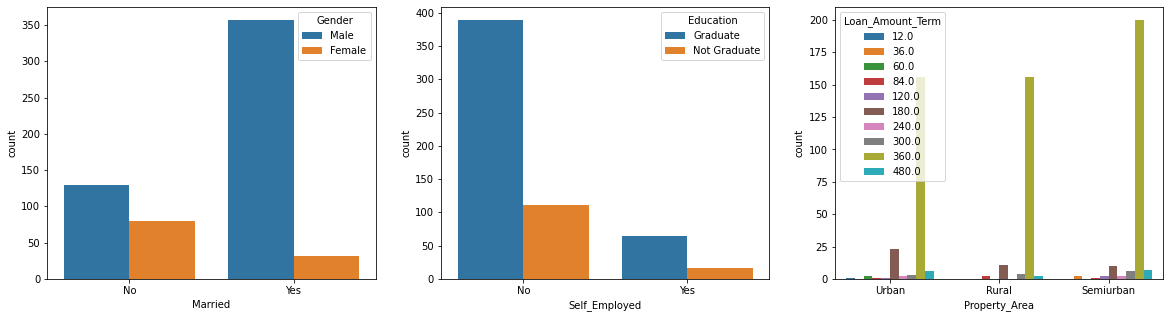

In [21]:
plt.figure(figsize=(20,5))
plt.subplot(131)
sns.countplot(data['Married'], hue=data['Gender'])
plt.subplot(132)
sns.countplot(data['Self_Employed'], hue=data['Education'])
plt.subplot(133)
sns.countplot(data['Property_Area'], hue=data['Loan_Amount_Term'])